In [2]:
# import library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Customer behavioral Analysis- Cohort Analysis
__Goal:__

* Understand business’ health and "stickiness" - the loyalty of your customers.
* Monitor customer engagement overtime
* Effective Comparison of data between Cohorts 

>(For instance, if the April cohort is more engaged than the March cohort, an analysis may be required on any changes that may have occurred between the two months.)

__Data:__
1. Online Retail Data [Data Source](https://archive.ics.uci.edu/ml/datasets/online+retail)

> (# of customers: 4373)

2. Transaction: between 12/01/2010 to 12/09/2011

# Load Data

In [38]:
df = pd.read_csv('UK retailer E-commerce data.csv',encoding = "ISO-8859-1",converters={'CustomerID':str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")

In [39]:
# get date attributes
df['Date'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m-%d'))    
df.Date = pd.to_datetime(df.Date)

In [40]:
df['OrderPeriod'] = df.Date.apply(lambda x: x.strftime('%Y-%m'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,OrderPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12


In [41]:
# Get total price
df['Total_Price'] = df['Quantity'] * df['UnitPrice']

In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,OrderPeriod,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12,20.34


In [43]:
df['CustomerID'].nunique()

4373

In [44]:
# assign customer into diff cohort group based on their first billing date
df.set_index('CustomerID', inplace=True)
df['CohortGroup'] = df.groupby(level=0)['Date'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,OrderPeriod,Total_Price,CohortGroup
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010-12-01,2010-12,15.30,2010-12
1,17850,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,2010-12,20.34,2010-12
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010-12-01,2010-12,22.00,2010-12
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,2010-12,20.34,2010-12
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,2010-12,20.34,2010-12


In [45]:
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'CustomerID': pd.Series.nunique,
                       'InvoiceNo': pd.Series.nunique,
                       'Total_Price': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'CustomerID': 'Total_Customers',
                        'InvoiceNo': 'Total_Orders'}, inplace=True)
cohorts.head()


Total_Customers  Total_Orders  Total_Price
CohortGroup OrderPeriod                                            
2010-12     2010-12                  949          2025    748957.02
            2011-01                  363           929    356542.40
            2011-02                  318           770    292372.72
            2011-03                  368          1117    405811.86
            2011-04                  342           971    268087.25

In [46]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [47]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

Total_Customers  Total_Orders  Total_Price  \
CohortGroup OrderPeriod                                               
2010-12     2010-12                  949          2025    748957.02   
            2011-01                  363           929    356542.40   
            2011-02                  318           770    292372.72   
            2011-03                  368          1117    405811.86   
            2011-04                  342           971    268087.25   

                         CohortPeriod  
CohortGroup OrderPeriod                
2010-12     2010-12                 1  
            2011-01                 2  
            2011-02                 3  
            2011-03                 4  
            2011-04                 5

In [48]:
df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,OrderPeriod,Total_Price,CohortGroup
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010-12-01,2010-12,15.30,2010-12
1,17850,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,2010-12,20.34,2010-12
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010-12-01,2010-12,22.00,2010-12
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,2010-12,20.34,2010-12
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010-12-01,2010-12,20.34,2010-12


# User Retention by Cohort Group

In [50]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['Total_Customers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2010-12    949
2011-01    421
2011-02    380
2011-03    440
2011-04    299
Name: Total_Customers, dtype: int64

In [51]:
unstack_cohorts = cohorts['Total_Customers'].unstack(0)
unstack_cohorts.head()

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,949.0,421.0,380.0,440.0,299.0,279.0,235.0,191.0,167.0,298.0,352.0,321.0,41.0
2,363.0,101.0,94.0,84.0,68.0,66.0,49.0,40.0,42.0,89.0,93.0,43.0,NaN
3,318.0,119.0,73.0,112.0,66.0,48.0,44.0,39.0,42.0,97.0,46.0,NaN,NaN
4,368.0,102.0,106.0,96.0,63.0,48.0,64.0,44.0,42.0,36.0,NaN,NaN,NaN
5,342.0,138.0,102.0,102.0,62.0,60.0,58.0,52.0,23.0,NaN,NaN,NaN,NaN


In [52]:
# divide each column by the corresponding cohort_group_size.
cust_retention = unstack_cohorts.divide(cohort_group_size, axis=1)
cust_retention.head(10)

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.382508,0.239905,0.247368,0.190909,0.227425,0.236559,0.208511,0.209424,0.251497,0.298658,0.264205,0.133956,NaN
3,0.335090,0.282660,0.192105,0.254545,0.220736,0.172043,0.187234,0.204188,0.251497,0.325503,0.130682,NaN,NaN
4,0.387777,0.242280,0.278947,0.218182,0.210702,0.172043,0.272340,0.230366,0.251497,0.120805,NaN,NaN,NaN
5,0.360379,0.327791,0.268421,0.231818,0.207358,0.215054,0.246809,0.272251,0.137725,NaN,NaN,NaN,NaN
6,0.397260,0.299287,0.247368,0.177273,0.237458,0.243728,0.336170,0.115183,NaN,NaN,NaN,NaN,NaN
7,0.380400,0.261283,0.255263,0.263636,0.230769,0.265233,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
8,0.355111,0.256532,0.281579,0.238636,0.260870,0.103943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.355111,0.311164,0.257895,0.288636,0.083612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot the cohorts over time in an effort to spot behavioral differences or similarities.

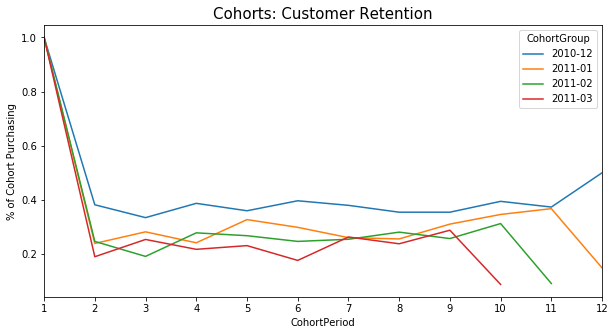

In [53]:
cust_retention[['2010-12', '2011-01', '2011-02','2011-03']].plot(figsize=(10,5))
plt.title('Cohorts: Customer Retention', fontsize=15)
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

### From the heatmap below, 2010-12 cohort group has largest average customer retention among all groups. <br>
* **We can compare the marketing campaign in 2010-12 with other campaigns held in different months and then validate the effectiveness of each campaign**  


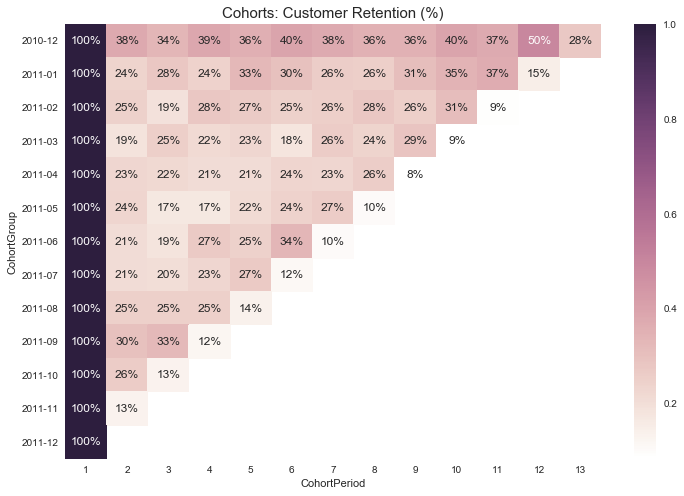

In [57]:
sns.set(style='white')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(12, 8))
sns.heatmap(cust_retention.T, mask=cust_retention.T.isnull(), cmap= cmap ,annot=True, fmt='.0%')
plt.title('Cohorts: Customer Retention (%)', fontsize=15)
plt.show()

### From the heat map below, we get better understanding that how many customers are in each cohort group
* **We can know that how many new customers are aquired from different campaign in each month.**

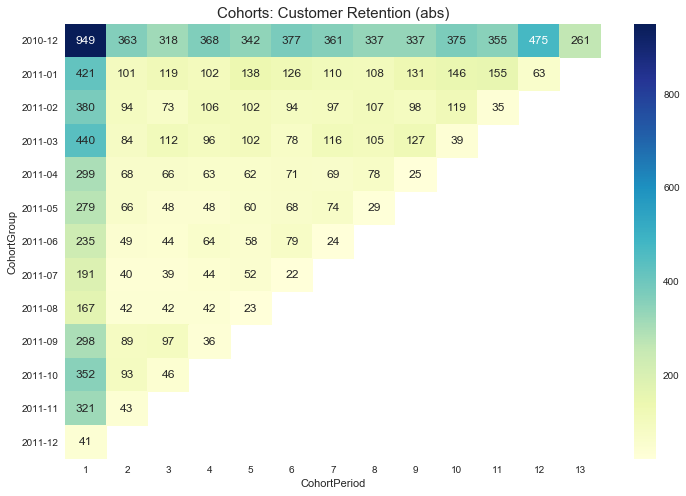

In [56]:
sns.set(style='white')
cmap = 'YlGnBu'
plt.figure(figsize=(12, 8))
sns.heatmap(unstack_cohorts.T, mask=unstack_cohorts.T.isnull(), cmap= cmap ,annot=True, fmt=".0f")
plt.title('Cohorts: Customer Retention (abs)', fontsize=15)
plt.show()